In [1]:
import pandas as pd
import numpy as np
import geoip2.database
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('../data/all_data.json', lines=True)

In [9]:
# Export source ip addresses for use in PyGeoIpMap
df['source_ip'].to_csv("out.txt", sep='\n',index=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [3]:
reader = geoip2.database.Reader('GeoLite2-City_20191203/GeoLite2-City.mmdb')
countries = {}
for ip in df['source_ip']:
    country = reader.city(ip).country.name
    if country in countries:
        countries[country] += 1
    else:
        countries[country] = 1

In [4]:
countries_df = pd.DataFrame.from_dict({'Country': list(countries.keys()), 'Count': [countries[i] for i in countries.keys()]})
countries_df = countries_df.sort_values(by=['Count'], ascending=False)
countries_df = countries_df.reset_index(drop=True)

#plot top 20 detected countries
plt.bar(np.arange(20), countries_df['Count'].iloc[:20], align='edge', width=0.3)
plt.xticks(np.arange(20), countries_df['Country'].iloc[:20], rotation='vertical')
plt.show()

NameError: name 'countries' is not defined

In [16]:
import io
import base64
 
def build_graph(x_coordinates, y_coordinates, labels):
    img = io.BytesIO()
    plt.bar(x_coordinates, y_coordinates, align='edge', width=0.3)
    plt.xticks(x_coordinates, labels, rotation='vertical')
    plt.tight_layout()
    plt.savefig(img, format='png')
    img.seek(0)
    graph_url = base64.b64encode(img.getvalue()).decode()
    plt.close()
    return 'data:image/png;base64,{}'.format(graph_url)

#build_graph(np.arange(20), countries_df['Count'].iloc[:20], countries_df['Country'].iloc[:20])

In [5]:
# Ignore line below, was messing around with something
#snort_val = df.loc[(df['source_ip'] == '209.17.97.18') & (pd.notna(df['snort']))]['snort'][560]

df

,_id,auth_attempts,destination_ip,destination_port,honeypot,hpfeed_id,identifier,protocol,sensor,session_ssh,snort,source_ip,source_port,timestamp
0,{'$oid': '5de4488cd21d354b96153801'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de4488ad21d354b96153800'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.166.49,33102,{'$date': '2019-12-01T23:11:06.553Z'}
1,{'$oid': '5de448a4d21d354b96153803'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de448a2d21d354b96153802'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.170.172,53943,{'$date': '2019-12-01T23:11:30.354Z'}
2,{'$oid': '5de448e0d21d354b96153805'},NaN,172.31.88.57,1433,p0f,{'$oid': '5de448dfd21d354b96153804'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,200.153.11.82,64409,{'$date': '2019-12-01T23:12:31.122Z'}
3,{'$oid': '5de448f5d21d354b96153807'},NaN,172.31.88.57,8181,p0f,{'$oid': '5de448f3d21d354b96153806'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,111.227.172.86,41968,{'$date': '2019-12-01T23:12:51.042Z'}
4,{'$oid': '5de44916d21d354b96153809'},NaN,172.31.88.57,23,p0f,{'$oid': '5de44914d21d354b96153808'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,94.181.181.24,45772,{'$date': '2019-12-01T23:13:24.445Z'}
5,{'$oid': '5de44931d21d354b9615380b'},NaN,172.31.88.57,8088,p0f,{'$oid': '5de4492fd21d354b9615380a'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.172.216.119,41960,{'$date': '2019-12-01T23:13:51.538Z'}
6,{'$oid': '5de44970d21d354b9615380d'},NaN,172.31.88.57,30303,p0f,{'$oid': '5de4496fd21d354b9615380c'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.97.106,34247,{'$date': '2019-12-01T23:14:55.189Z'}
7,{'$oid': '5de449a0d21d354b9615380f'},NaN,172.31.88.57,32084,p0f,{'$oid': '5de4499ed21d354b9615380e'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,185.143.221.186,48389,{'$date': '2019-12-01T23:15:42.002Z'}
8,{'$oid': '5de449d6d21d354b96153811'},NaN,172.31.88.57,23,p0f,{'$oid': '5de449d4d21d354b96153810'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,42.113.244.245,14402,{'$date': '2019-12-01T23:16:36.370Z'}
9,{'$oid': '5de44a81d21d354b96153813'},NaN,172.31.88.57,67,p0f,{'$oid': '5de44a80d21d354b96153812'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.96.34,63370,{'$date': '2019-12-01T23:19:28.319Z'}


In [6]:
df.shape

(2651, 14)

In [7]:
# Drop non snort datapoints
base_snort = df.dropna(subset=['snort'])
snort_source_ip = base_snort['source_ip'].tolist()
snort = base_snort['snort']

print('snort has {} detections'.format(snort.shape[0]))
snort = pd.io.json.json_normalize(snort)
# snort.sort_values(by='priority', ascending=True)
test = [i for i in range(509)]
snort['source_ip'] = snort_source_ip
snort

# Drop non snort datapoints
#snort = df.dropna(subset=['snort'])
#snort = snort['snort']
# Uncomment line below to reset indices
# snort = snort.reset_index(drop=True)
#print('snort has {} detections'.format(snort.shape[0]))
#snort = pd.io.json.json_normalize(snort)
#snort.sort_values(by='priority', ascending=True)


snort has 509 detections


,classification,header,priority,signature,source_ip
0,3,1:2010936:3,2,ET SCAN Suspicious inbound to Oracle SQL port ...,209.17.97.18
1,30,1:2403478:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,94.102.49.65
2,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1,185.175.93.78
3,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1,185.176.27.246
4,30,1:2403468:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,91.173.121.137
5,3,1:2010935:3,2,ET SCAN Suspicious inbound to MSSQL port 1433,82.200.247.230
6,30,1:2403444:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,82.200.247.230
7,30,1:2403340:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,40.121.109.186
8,30,1:2500020:5265,2,ET COMPROMISED Known Compromised or Hostile Ho...,40.121.109.186
9,30,1:2403438:53518,2,ET CINS Active Threat Intelligence Poor Reputa...,80.82.70.239


In [8]:
ssh = df.dropna(subset=['session_ssh'])
ssh = ssh['session_ssh']
ssh = pd.io.json.json_normalize(ssh)
ssh

,version
0,'SSH-2.0-OpenSSH_7.9p1 Ubuntu-10'
1,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u4'
2,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u4'
3,None
4,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u5'
5,'SSH-2.0-OpenSSH_6.7p1 Raspbian-5+deb8u5'
6,'SSH-2.0-libssh-0.1'
7,'SSH-2.0-libssh-0.1'
8,'SSH-2.0-libssh-0.1'
9,''


In [2]:
# NEW DATA!

In [117]:
sess_df = pd.read_json('../data/exported_session_data.json', lines=True)

In [118]:
sess_df

,_id,attachments,auth_attempts,destination_ip,destination_port,honeypot,hpfeed_id,identifier,protocol,sensor,session_ssh,snort,source_ip,source_port,timestamp
0,{'$oid': '5de4488cd21d354b96153801'},NaN,NaN,172.31.88.57,8088,p0f,{'$oid': '5de4488ad21d354b96153800'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.166.49,33102,{'$date': '2019-12-01T23:11:06.553Z'}
1,{'$oid': '5de448a4d21d354b96153803'},NaN,NaN,172.31.88.57,8088,p0f,{'$oid': '5de448a2d21d354b96153802'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.99.170.172,53943,{'$date': '2019-12-01T23:11:30.354Z'}
2,{'$oid': '5de448e0d21d354b96153805'},NaN,NaN,172.31.88.57,1433,p0f,{'$oid': '5de448dfd21d354b96153804'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,200.153.11.82,64409,{'$date': '2019-12-01T23:12:31.122Z'}
3,{'$oid': '5de448f5d21d354b96153807'},NaN,NaN,172.31.88.57,8181,p0f,{'$oid': '5de448f3d21d354b96153806'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,111.227.172.86,41968,{'$date': '2019-12-01T23:12:51.042Z'}
4,{'$oid': '5de44916d21d354b96153809'},NaN,NaN,172.31.88.57,23,p0f,{'$oid': '5de44914d21d354b96153808'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,94.181.181.24,45772,{'$date': '2019-12-01T23:13:24.445Z'}
5,{'$oid': '5de44931d21d354b9615380b'},NaN,NaN,172.31.88.57,8088,p0f,{'$oid': '5de4492fd21d354b9615380a'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,167.172.216.119,41960,{'$date': '2019-12-01T23:13:51.538Z'}
6,{'$oid': '5de44970d21d354b9615380d'},NaN,NaN,172.31.88.57,30303,p0f,{'$oid': '5de4496fd21d354b9615380c'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.97.106,34247,{'$date': '2019-12-01T23:14:55.189Z'}
7,{'$oid': '5de449a0d21d354b9615380f'},NaN,NaN,172.31.88.57,32084,p0f,{'$oid': '5de4499ed21d354b9615380e'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,185.143.221.186,48389,{'$date': '2019-12-01T23:15:42.002Z'}
8,{'$oid': '5de449d6d21d354b96153811'},NaN,NaN,172.31.88.57,23,p0f,{'$oid': '5de449d4d21d354b96153810'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,42.113.244.245,14402,{'$date': '2019-12-01T23:16:36.370Z'}
9,{'$oid': '5de44a81d21d354b96153813'},NaN,NaN,172.31.88.57,67,p0f,{'$oid': '5de44a80d21d354b96153812'},d046e2a8-148f-11ea-8925-120824e1a381,pcap,NaN,NaN,NaN,209.17.96.34,63370,{'$date': '2019-12-01T23:19:28.319Z'}


In [121]:
sess_df.shape


base_snort = sess_df.dropna(subset=['snort'])
# snort_source_ip = base_snort['source_ip'].tolist()
snort = base_snort['snort']
snort = pd.io.json.json_normalize(snort)
snort

,classification,header,priority,signature
0,3,1:2010936:3,2,ET SCAN Suspicious inbound to Oracle SQL port ...
1,30,1:2403478:53518,2,ET CINS Active Threat Intelligence Poor Reputa...
2,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1
3,30,1:2402000:5377,2,ET DROP Dshield Block Listed Source group 1
4,30,1:2403468:53518,2,ET CINS Active Threat Intelligence Poor Reputa...
5,3,1:2010935:3,2,ET SCAN Suspicious inbound to MSSQL port 1433
6,30,1:2403444:53518,2,ET CINS Active Threat Intelligence Poor Reputa...
7,30,1:2403340:53518,2,ET CINS Active Threat Intelligence Poor Reputa...
8,30,1:2500020:5265,2,ET COMPROMISED Known Compromised or Hostile Ho...
9,30,1:2403438:53518,2,ET CINS Active Threat Intelligence Poor Reputa...


<class 'numpy.int64'>


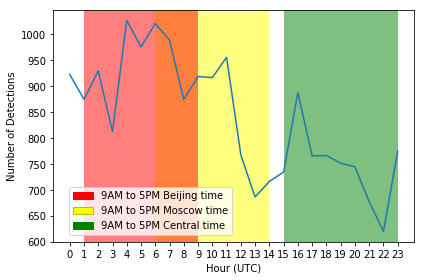

20096

In [125]:
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.patches import Patch

ex_time = sess_df.iloc[0]['timestamp']['$date']

#For date and time parsing use the following line
sess_df['hour'] = sess_df.apply(lambda row: datetime.strptime(row.timestamp['$date'].split('.')[0], '%Y-%m-%dT%H:%M:%S').hour, axis = 1)

#For just time (hour:min:sec) use the following line
# sess_df['time'] = sess_df.apply(lambda row: datetime.strptime(row.timestamp['$date'].split('.')[0], '%Y-%m-%dT%H:%M:%S').strftime('%H:%M:%S'), axis = 1)
print(type(sess_df.iloc[0]['hour']))

# sess_df['time']
# t = sess_df.iloc[0]['time'].to_pydatetime()


# sess_df
hours = np.arange(24)
hours_dict = {}
for hour in hours:
    hours_dict[hour] = len(sess_df[sess_df['hour'] == hour])


hours_df = pd.DataFrame.from_dict({'Hour': list(hours_dict.keys()), 'Count': [hours_dict[i] for i in hours_dict.keys()]})
hours_df = hours_df.sort_values(by=['Hour'], ascending=True)
hours_df = hours_df.reset_index(drop=True)

fig = plt.figure()
ax = fig.add_subplot(111)



ax.plot(hours_df['Hour'], hours_df['Count'])
ax.axvspan(6, 14, facecolor='yellow', alpha=0.5) #9 AM to 5 PM Moscow time in UTC
ax.axvspan(15, 23, facecolor='green', alpha=0.5) #9 AM to 5 PM Central time in UTC
ax.axvspan(1,9, facecolor='red', alpha=0.5) #9 AM to 5 PM Chinese time in UTC

plt.xticks(np.arange(len(hours_dict.keys())), hours_df['Hour'])
plt.xlabel('Hour (UTC)')
plt.ylabel('Number of Detections')

legend_elements = [Patch(facecolor='red', edgecolor='r',
                         label='9AM to 5PM Beijing time'),
                   Patch(facecolor='yellow', edgecolor='y',
                         label='9AM to 5PM Moscow time'),
                   Patch(facecolor='green', edgecolor='g',
                         label='9AM to 5PM Central time')]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.51, 0.26))

plt.tight_layout()
# plt.savefig('time_breakdown.png', format='png')
# plt.close()
plt.show()
sum(hours_dict.values())
# sess_df.set_index('time', inplace=True)
# values = np.ones(len(sess_df.index))
# ticklabels = sess_df.index.strftime('%Y-%m-%dT%H:%M:%S')
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(sess_df.index, values)
# ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.xticks(rotation='vertical')
# plt.show()

In [31]:
import matplotlib.dates as md
import time
from datetime import datetime
'''
n=20
duration=1000
now=time.mktime(time.localtime())
timestamps=np.linspace(now,now+duration,n)
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
datenums=md.date2num(dates)
values=np.sin((timestamps-now)/duration*2*np.pi)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,values)
plt.show()
'''

print(ex_time)
ex_time = ex_time.split('.')
ex_time = ex_time[0]
print(ex_time)
new_time = datetime.strptime(ex_time, '%Y-%m-%dT%H:%M:%S')
new_time.time()
# time.mktime(time.localtime())

2019-12-01T23:11:06
2019-12-01T23:11:06


11

In [5]:
meta_df = pd.read_json('../data/exported_metadata_data.json', lines=True)

In [6]:
meta_df

,_id,honeypot,ip,link,os,timestamp,uptime
0,{'$oid': '5de44916bcff26f75a8fb152'},p0f,94.181.181.24,NaN,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-01T23:13:24.445Z'},NaN
1,{'$oid': '5de44970bcff26f75a8fb160'},p0f,209.17.97.106,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T01:09:01.853Z'},NaN
2,{'$oid': '5de44a81bcff26f75a8fb171'},p0f,209.17.96.34,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T06:44:36.453Z'},NaN
3,{'$oid': '5de44c35bcff26f75a8fb1cd'},p0f,45.141.86.126,Ethernet or modem,NaN,{'$date': '2019-12-01T23:26:43.701Z'},NaN
4,{'$oid': '5de44c50bcff26f75a8fb1d6'},p0f,209.17.96.90,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T07:17:02.533Z'},NaN
5,{'$oid': '5de44c5cbcff26f75a8fb1dd'},p0f,209.17.96.194,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T20:35:40.445Z'},NaN
6,{'$oid': '5de44c74bcff26f75a8fb1e4'},p0f,105.159.134.219,DSL,NaN,{'$date': '2019-12-01T23:27:46.502Z'},NaN
7,{'$oid': '5de44cadbcff26f75a8fb1f0'},p0f,209.17.97.122,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T19:29:00.145Z'},NaN
8,{'$oid': '5de44f4ebcff26f75a8fb24c'},p0f,185.142.236.35,Ethernet or modem,Linux 2.2.x-3.x (barebone),{'$date': '2019-12-05T08:08:59.897Z'},NaN
9,{'$oid': '5de44f8dbcff26f75a8fb256'},p0f,171.244.175.136,DSL,Windows 7 or 8,{'$date': '2019-12-01T23:41:00.323Z'},NaN


In [12]:
os_set = set(meta_df['os'].unique())
os_dict = {}
for os in os_set:
    os_dict[os] = len(meta_df[meta_df['os'] == os])
os_dict

{'Linux 2.2.x-3.x': 31,
 'Linux 2.2.x-3.x (barebone)': 235,
 'Linux 2.2.x-3.x (no timestamps)': 2,
 'Linux 2.4.x': 2,
 'Linux 2.6.x': 2,
 'Linux 3.1-3.10': 8,
 'Linux 3.11 and newer': 32,
 'Linux 3.x': 3,
 'Windows 7 or 8': 202,
 'Windows NT kernel': 7,
 'Windows NT kernel 5.x': 1,
 'Windows XP': 10,
 nan: 0}

''
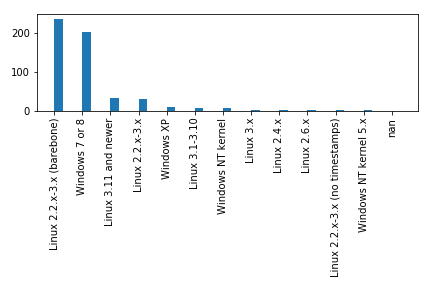

In [17]:
os_df = pd.DataFrame.from_dict({'os': list(os_dict.keys()), 'Count': [os_dict[i] for i in os_dict.keys()]})
os_df = os_df.sort_values(by=['Count'], ascending=False)
os_df = os_df.reset_index(drop=True)

build_graph(np.arange(len(os_dict.keys())), os_df['Count'].iloc[:20], os_df['os'].iloc[:20])

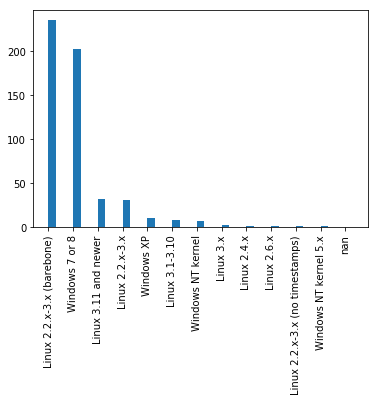

In [14]:
plt.bar(np.arange(len(os_dict.keys())), os_df['Count'].iloc[:20], align='edge', width=0.3)
plt.xticks(np.arange(len(os_dict.keys())), os_df['os'].iloc[:20], rotation='vertical')
plt.show()